# Market Trend Analysis

1. Identify what you want to find
- category
- brands
- models
- topics
2. Identify sources of trends
- social media
- news
- competitors
- trend aggregators
- niches
3. Capture data from sources and store
4. organize data in storage
5. Create analysis of trends, Viz, Stats
- virality
- seasonality
- correlations
- culture
- lifestyles
- locations
6. Deployment & Interaction

## References
 - https://pypi.org/project/pytrends/
 - https://github.com/rframadanti/gtrends_multiple/blob/master/pytrends_multiple_keywords.ipynb
 - https://towardsdatascience.com/telling-stories-with-google-trends-using-pytrends-in-python-a11e5b8a177
 - https://github.com/mikedbjones/longtrends
 - https://www.thepythoncode.com/article/extract-google-trends-data-in-python
 - https://medium.com/analytics-vidhya/compare-more-than-5-keywords-in-google-trends-search-using-pytrends-3462d6b5ad62

# Lazada

In [1]:
url = "https://www.lazada.com.ph/"

In [2]:
from bs4 import BeautifulSoup
import requests

req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
print(soup.title)

<title>Lazada Philippines: Shop online up to 90% off Branded LazFlash!</title>


In [3]:
spans_list = soup.find_all(attrs={"data-spm":"cate_8_1"})[0].find_all("span")
subcats = [i.string for i in spans_list]
subcats

['Dresses',
 'Tops',
 'Jackets & Coats',
 'Hoodies & Sweatshirts',
 'Sets & Coordinates',
 'Jumpsuits & Playsuits',
 'Jeans',
 'Pants & Leggings',
 'Shorts',
 'Skirts',
 'Swimwear & Beachwear',
 'Couple & Family Sets']

In [4]:
from functools import reduce
import operator

new_list = [i.split("&") for i in subcats]
updated_list = reduce(operator.concat, new_list)
updated_list = [i.strip() for i in updated_list]
updated_list = ["Female "+(i) for i in updated_list]

In [5]:
updated_list

['Female Dresses',
 'Female Tops',
 'Female Jackets',
 'Female Coats',
 'Female Hoodies',
 'Female Sweatshirts',
 'Female Sets',
 'Female Coordinates',
 'Female Jumpsuits',
 'Female Playsuits',
 'Female Jeans',
 'Female Pants',
 'Female Leggings',
 'Female Shorts',
 'Female Skirts',
 'Female Swimwear',
 'Female Beachwear',
 'Female Couple',
 'Female Family Sets']

# Google Trends

In [6]:
# pip install pytrends
import pandas as pd
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=480, backoff_factor=1)
# https://forbrains.co.uk/international_tools/earth_timezones

Remove one to act as baseline for comparison, divide the rest by 4 terms

In [21]:
pytrends.build_payload(['andrei','paolo','cezra','rex','gem'],cat=185, timeframe="today 1-m", geo="PH", gprop='')
df_time_tmp = pytrends.interest_over_time()
df_time_tmp

,andrei,paolo,cezra,rex,gem,isPartial
date,,,,,,
2022-10-23,21,0,0,0,0,False
2022-10-24,0,0,0,0,28,False
2022-10-25,27,0,0,0,25,False
2022-10-26,0,33,0,0,0,False
2022-10-27,0,0,0,0,0,False
2022-10-28,0,0,0,0,23,False
2022-10-29,0,23,0,0,0,False
2022-10-30,0,0,0,0,0,False
2022-10-31,21,0,0,0,0,False


In [7]:
updated_list[0]

'Female Dresses'

In [8]:
updated_list[1:]

['Female Tops',
 'Female Jackets',
 'Female Coats',
 'Female Hoodies',
 'Female Sweatshirts',
 'Female Sets',
 'Female Coordinates',
 'Female Jumpsuits',
 'Female Playsuits',
 'Female Jeans',
 'Female Pants',
 'Female Leggings',
 'Female Shorts',
 'Female Skirts',
 'Female Swimwear',
 'Female Beachwear',
 'Female Couple',
 'Female Family Sets']

In [9]:
# get sample for holdout
pytrends.build_payload(updated_list[0:5],cat=185, timeframe="today 1-m", geo="PH", gprop='')
df_time_tmp = pytrends.interest_over_time()
del df_time_tmp['isPartial']

In [14]:
df_time_tmp

,Female Dresses,Female Tops,Female Jackets,Female Coats,Female Hoodies
date,,,,,
2022-10-23,0,0,0,0,0
2022-10-24,0,0,0,0,0
2022-10-25,0,0,0,0,0
2022-10-26,0,0,0,0,0
2022-10-27,0,0,0,0,0
2022-10-28,0,21,0,0,0
2022-10-29,0,0,0,0,0
2022-10-30,0,0,0,0,0
2022-10-31,0,0,0,0,0


In [10]:
holdout = df_time_tmp.mean().sort_values(ascending=False).index[0]
filtered_list = updated_list.copy()
filtered_list.remove(holdout)

print("Holdout is: ",holdout)
  
# create groups of 5 max each
total = len(filtered_list)
max_cnt = int(total/4)
print("total groups: ",max_cnt)
print("total count-1: ",len(filtered_list))

df_lists = []
for i in range(0, total-1, 4):
    tmp_list = []
    tmp_list.append(holdout)
    for j in range(0, 4, 1):
        if(i+j<total-1):
            tmp_list.append(filtered_list[i+j])
    df_lists.append(tmp_list)
df_lists

Holdout is:  Female Tops
total groups:  4
total count-1:  18


[['Female Tops',
  'Female Dresses',
  'Female Jackets',
  'Female Coats',
  'Female Hoodies'],
 ['Female Tops',
  'Female Sweatshirts',
  'Female Sets',
  'Female Coordinates',
  'Female Jumpsuits'],
 ['Female Tops',
  'Female Playsuits',
  'Female Jeans',
  'Female Pants',
  'Female Leggings'],
 ['Female Tops',
  'Female Shorts',
  'Female Skirts',
  'Female Swimwear',
  'Female Beachwear'],
 ['Female Tops', 'Female Couple']]

In [11]:


time = "today 1-m"
loc="PH"
cat=185
gprop='' #websearches

df_time_lists = []
for i in df_lists:
    pytrends.build_payload(i,cat=cat, timeframe=time, geo=loc, gprop=gprop)
    df_time = pytrends.interest_over_time()
    del df_time['isPartial']
    df_time_lists.append(df_time)


len(df_time_lists)

5

#identify a hold out column
#mean1

In [12]:
mean_list = [i.mean() for i in df_time_lists]
name_list = []
for j in mean_list:
    normFactor = mean_list[0][holdout]/j[holdout]
    for k,i in enumerate(j):
        name = j.index[k]
        rate = ((i*normFactor).round(6))
        temp = {'name':name,'rate':rate}
        name_list.append(temp)
name_df = pd.DataFrame(name_list).drop_duplicates().sort_values('rate',ascending=False)
name_df

,name,rate
16,Female Shorts,14.000000
0,Female Tops,8.035714
7,Female Sets,6.571429
13,Female Pants,6.535714
12,Female Jeans,5.857143
21,Female Couple,5.714286
1,Female Dresses,1.000000
6,Female Sweatshirts,0.000000
8,Female Coordinates,0.000000
9,Female Jumpsuits,0.000000


---
# Long Trends

<AxesSubplot:title={'center':'Google Trends: Female Tops'}, xlabel='date'>

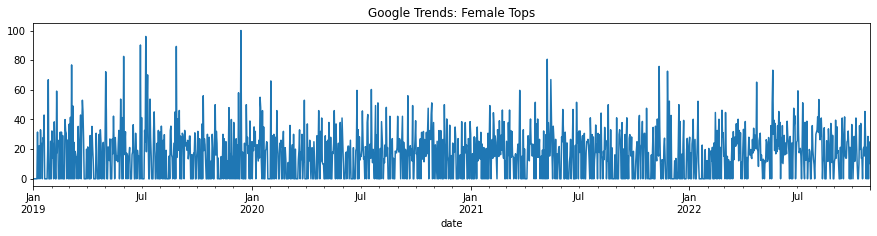

In [16]:
from longtrends import LongTrend
from datetime import datetime

keyword = 'Female Tops'

# Create LongTrend object
longtrend = LongTrend(
                      keyword=keyword,
                      start_date=datetime(2019, 1, 1),
                      end_date=datetime(2022, 10, 31))        # use verbose=True for print output
# Build long-term trends
lt_built = longtrend.build()

# Plot
lt_built.plot(title=f"Google Trends: {longtrend.keyword}", figsize=(15, 3))